<a href="https://colab.research.google.com/github/aneetat1/NASA-SEES-Internship/blob/main/Aneeta_Thokkadam_SEES_4_Radial_Velocity_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aneeta Thokkadam, Climate Disaster Preparedness (O-CD), 07/01/2022 🪐**

#Setup Google Drive access for data input and output

*The following two code cells are not mentioned or used in the PyaR tutorial.*

We use the same code presented at the beginning of Notebook 3. Here we have combined some of the statements for brevity.

In [ ]:
# Step 1 - Mounting the Google Drive. User will need to give access to their 
#          Google drive for reading/writing data
from google.colab import drive
drive.mount('/content/drive')
# import the os.path package for path name construction
from os import path as path

Mounted at /content/drive


## Create variable for input folder in your Google Drive

Use the following steps to verify the full path to the sip_data folder.

1.   Highlight your sip_data folder
2.   Click the three vertical dots that appear at right
3.   Choose the option to *Copy path*


In [ ]:
# here is the standard path if your placed the sip_data folder as directed
in_dir = '/content/drive/MyDrive/sip_data'
#in_dir = '' # Otherwise, uncomment and paste your path here.
print("My path to the sip_data folder is {}".format(in_dir))

My path to the sip_data folder is /content/drive/MyDrive/sip_data


## Radial Velocity Activity

On to the primary activity of Notebook 4, 

In this activity, we will be looking at some plotted spectra and measuring their velocities. As usual, begin by running the first cell to import Matplotlib and NumPy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, on to the science! Your ***sip_data*** folder contains spectra of 3 stars (text files named 491422_spec.txt, 6004761_spec.txt, and 1757844_spec.txt). Note also the AGB_tmpl.txt file and similar templates for MS and RGB. Your task is to measure the radial velocities of these stars. 

Modify the *shiftToMoving* function below so that it converts the template rest wavelength array to a Doppler shifted moving wavelength.
How to do this? You will need to convert a mathematical equation into Python code. First you need to know the equation. NASA and the Internet are your friends here. Specifically NASA's [Goddard Space Flight Center](https://imagine.gsfc.nasa.gov/features/yba/M31_velocity/spectrum/doppler_more.html) offers a great explanation of the Doppler shift and the exact equation for a Doppler shifted wavelength. Your challenge is to convert the formula into Pythonese.

Remember that Lambda is the Greek letter $\lambda$ and the symbol for wavelength. So, $\lambda_{0}$ is resting wavelength (restLamba) while $\lambda^\prime$ is Doppler shifted moving wavelength (newLamba). Velocity is represented by $\upsilon$ and speed, $c_{0}$, will be the speed of light, in this astronomy case. So you will need to know the value for the constant, speed of light. Choose a variable name for $c_{0}$ and assign it the proper value in kilometers per second.

**Note**: Try this on your own. If you cannot figure out how to write the equation, you can watch the notebook 4 tutorial video, 

In [ ]:
def shiftToMoving(restLambda, v):
    """Function to shift a wavelength array using the Doppler equation.
    """
    c = 299792.458 #speed of light in km/s

    newLambda = restLambda * (1 + v/c)
    return newLambda

Make sure that your code makes sense: If you apply a positive velocity, should the shifted wavelength be longer or shorter than the original wavelength? Does your code reproduce your expectation? Test your code below with my favorite rest wavelength and a few velocities.

How to test the code? Set the variables required to run the shiftToMoving function and 'call' the function - enter it as a command. Can't remember how to do this? Revisit the functions section in ***SEES 1-Python Intro.ipynb***.

In [ ]:
rest_h_alpha = 6563.
# Fill in code here to test shiftToMoving with v = 200 km/s and v = -200 km/s.
# Name your own velocity variable 
# Does your answer make sense?
print(shiftToMoving(rest_h_alpha, 200))
print(shiftToMoving(rest_h_alpha, -200))
##if it has a negative velocity, the wavelength gets shorter

6567.3783623135705
6558.6216376864295


Now on to our 3 stars for today's activity. The first step is to pick a science star and a template star and read in the files. Fill in the name of the star in "star_name" (e.g., 6004761, 1757844, or 491422) and pick a template to put in "temp_name" (e.g., MS, RGB, AGB).

We use code similar to what we used in Notebook 3 to construct complete file paths.

In [ ]:
star_name='1757844'
temp_name='MS'
scienceFilename = star_name + '_spec.txt'
templateFilename = temp_name+ '_tmpl.txt'

scienceFile = path.join(in_dir, scienceFilename)
print(scienceFile)
templateFile = path.join(in_dir, templateFilename)
print(templateFile)

sciLambda, sciFlux = np.loadtxt(scienceFile, unpack = True)
tmpLambda, tmpFlux = np.loadtxt(templateFile, unpack = True)


/content/drive/MyDrive/sip_data/1757844_spec.txt
/content/drive/MyDrive/sip_data/MS_tmpl.txt


This next line is the key line in the code--it shifts the template velocity to your suggested velocity for the star, and makes a plot showing the two. Put in an intial guess for the velocity of the star and see how it looks!

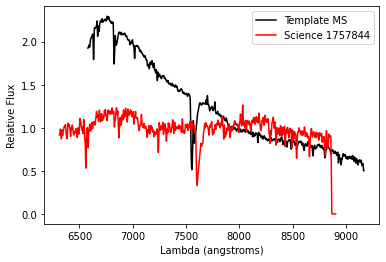

In [ ]:
v_guess=-2000
#Shift template spectrum using the Doppler equation
new_tmpLambda = shiftToMoving(tmpLambda, v_guess)

#Plot science and template spectra on the same axes.
ax = plt.axes()
ax.plot(new_tmpLambda, tmpFlux, c = 'black', label = 'Template ' + temp_name)
ax.plot(sciLambda, sciFlux, c = 'red', label = 'Science ' + star_name)
ax.set_xlabel('Lambda (angstroms)')
ax.set_ylabel('Relative Flux')

plt.legend()

Does the template look like a good match for this star? Try the other two templates to see which one looks the most like the science star. Do this by editing temp_name above, and then re-run the cell that reads in the files and the cell that shifts the wavelength and makes the plot.

After you're happy with your template, use the command ax.set_xlim(7000, 7200) to zoom in on the region between 7000 and 7200 angstroms. Play with "v_guess" until you're happy with how the two are lined up. Once you're happy with your velocity, write it down--and repeat with the next two science stars! 

# Response requested - Respond when completing the Intermediate Level
### Record your velocities here (double click on this cell to edit):

6004761: Template= **AGB** , Velocity = **-230 km/s**

1757844: Template= **MS** , Velocity = **-2000 km/s**

491422:  Template= **RGB** , Velocity = **-150 km/s**


## Radial Velocity Map of Andromeda

Now that you've successfully measured the velocities of a few stars, let's look at the velocities of all the stars we have in the Andromeda galaxy! First, we need to read in the data file containing our velocities. To do so, repeat the commands to construct the keck_hst_data full path:

In [ ]:
keck_hst_data = path.join(in_dir, 'keck_hst_data.txt')
print(keck_hst_data)

#Read in data
ra, dec, xi, eta, f475w, f814w, v, verr = np.loadtxt(keck_hst_data, 
                                                     unpack = True)

#conversion factor: degrees to kiloparsecs (this is a distance)
deg2kpc = 13.67
xi *= deg2kpc
eta *= deg2kpc

/content/drive/MyDrive/sip_data/keck_hst_data.txt


Now we make the plot showing the positions of the stars and color coding the stars based on their velocities.

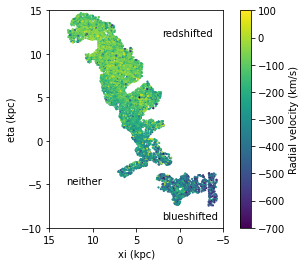

In [ ]:
ax = plt.axes(aspect = 'equal')
ax.set_xlabel('xi (kpc)')
ax.set_ylabel('eta (kpc)')
ax.set_xlim(15, -5)
ax.set_ylim(-10, 15)
ax.text(2, -9, 'blueshifted')
ax.text(2, 12, 'redshifted')
ax.text(13, -5, 'neither')
# the color map (cmap variable) viridis is the default for 
#     matplotlib versions > 2
cc = ax.scatter(xi, eta, c = v, s = 5, edgecolors = 'none', vmin = -700, 
                vmax = 100, cmap='viridis')   

plt.colorbar(cc, label = 'Radial velocity (km/s)')

Edit the code cell above to label parts of the plot as "blueshifted," "redshifted," or "neither," relative to M31's center. You can use the ax.text() command to edit the plot--for example,

ax.text(1, -.5, ‘I am at school late today.’)

Insert the ax.text() statements after setting the x and y limits.

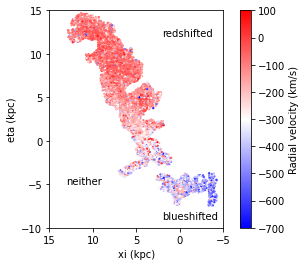

In [ ]:
# Redo the map with a different colorbar that visually
# illustrates red and blue-shifted regions.  For a list
# of all of matplotlib's colormaps see here:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax = plt.axes(aspect = 'equal')
ax.set_xlabel('xi (kpc)')
ax.set_ylabel('eta (kpc)')
ax.set_xlim(15, -5)
ax.set_ylim(-10, 15)
ax.text(2, -9, 'blueshifted')
ax.text(2, 12, 'redshifted')
ax.text(13, -5, 'neither')
cc = ax.scatter(xi, eta, c = v, s = 5, edgecolors = 'none', vmin = -700, vmax = 100,
                cmap='bwr')
plt.colorbar(cc, label = 'Radial velocity (km/s)')

# Preparing for the Basic Level Certificate

After you have attempted to run the notebook, watched the assigned videos, and possibly rerun the notebook, take the quiz to complete the requirements for Notebook 4.

We encourage you to complete the notebook and submit it as part of the Intermediate Level Certificate. You are almost there!

# Respond to the following question when completing the Intermediate Level:

Based on your plot, what is the systemic velocity (average velocity) of Andromeda relative to us? Answer as best you can.

*Double click or use Markdown pencil icon to start editing.*

**Based on the plot, the systemic velocity of Andromeda relative to us is around -300 km/s**

# Preparing for the Intermediate Level Certificate
When you have successfully modified the code as directed and have answered questions, you can prepare this notebook for submission. 

Add a new text cell to the very top of your notebook. Write **your full name**, **your team code**, **your specific team name** and **the date** in the text block.

Make sure that your saved notebook shows your output by running all code cells. Your notebook is already located in the **Your work** area for this assignment.

Turn in your notebook in the Google Classroom.

# CREDIT: Prof. Raja GuhaThakurta of UCSC and the Science Internship Program
This Python tutorial was originally developed by Dr. Raja GuhaThakurta and his astronomy graduate students as part of the [Science Internship Program (SIP)](http://ucsc-sip.org/about/) for Bay Area high school students at the University of California Santa Cruz (UCSC). Dr. GuhaThakurta's tutorial is called Python and Research (PyaR).

SEES thanks Dr. GuhaThakurta for his generosity in sharing Jupyter notebooks, video tutorials, data, and related resources.

In 2020, a SEES mentor adapted Dr. GuhaThakurta's tutorials to run in the Google Colaboratory. The current notebook has been updated for 2022 SEES.   